In [401]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.simplefilter('ignore')

dataset= pd.read_csv('./mytest/train.csv')

dataset_test = pd.read_csv('./mytest/test.csv')
dataset

,traveller_ID,ticket_class,name,sex,age,Siblings_spouses,Parchil,TickNum,fare,cabin,embarked,MedBoat,Survived
0,1214,3,"Smiljanic, Mr. Mile",male,NaN,0,0,315037,8.6625,NaN,S,NaN,0
1,677,3,"Bostandyeff, Mr. Guentcho",male,26.0,0,0,349224,7.8958,NaN,S,NaN,0
2,534,2,"Phillips, Miss. Kate Florence (""Mrs Kate Louis...",female,19.0,0,0,250655,26.0000,NaN,S,11,1
3,1174,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S,NaN,0
4,864,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
911,1095,3,"O'Sullivan, Miss. Bridget Mary",female,NaN,0,0,330909,7.6292,NaN,Q,NaN,0
912,1130,3,"Pettersson, Miss. Ellen Natalia",female,18.0,0,0,347087,7.7750,NaN,S,NaN,0
913,1294,3,"Williams, Mr. Leslie",male,28.5,0,0,54636,16.1000,NaN,S,NaN,0
914,860,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN,1


In [402]:
dataset.isnull()

,traveller_ID,ticket_class,name,sex,age,Siblings_spouses,Parchil,TickNum,fare,cabin,embarked,MedBoat,Survived
0,False,False,False,False,True,False,False,False,False,True,False,True,False
1,False,False,False,False,False,False,False,False,False,True,False,True,False
2,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,True,False,False,False,False,True,False,True,False
4,False,False,False,False,False,False,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
911,False,False,False,False,True,False,False,False,False,True,False,True,False
912,False,False,False,False,False,False,False,False,False,True,False,True,False
913,False,False,False,False,False,False,False,False,False,True,False,True,False
914,False,False,False,False,False,False,False,False,False,True,False,True,False


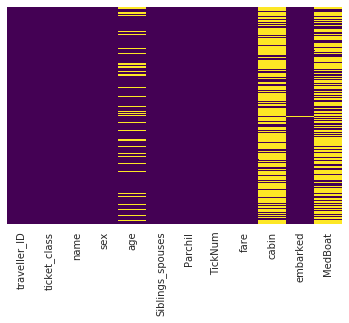

In [403]:
sns.heatmap(dataset_test.isnull(),yticklabels=False,cbar = False,cmap = 'viridis')

In [404]:
sns.set_style('whitegrid')

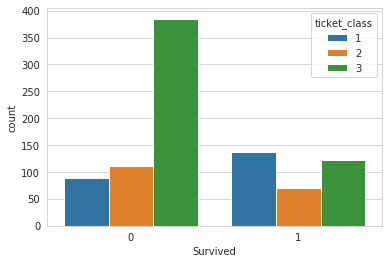

In [405]:
sns.countplot(x= 'Survived',hue = 'ticket_class', data = dataset)

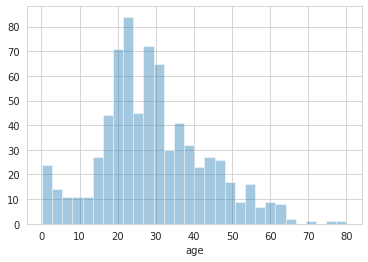

In [406]:
sns.distplot(dataset['age'].dropna(),kde=False,bins =30)

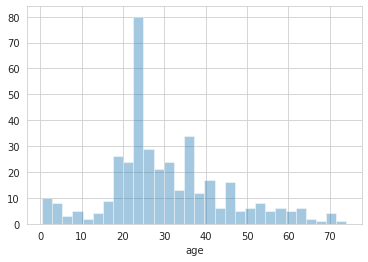

In [439]:
sns.distplot(dataset_test['age'].dropna(),kde=False,bins =30)

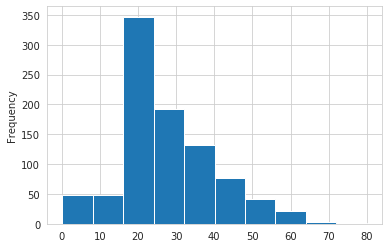

In [440]:
dataset['age'].plot.hist()

In [441]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 914 entries, 0 to 915
Data columns (total 9 columns):
ticket_class        914 non-null int64
age                 914 non-null float64
Siblings_spouses    914 non-null int64
Parchil             914 non-null int64
fare                914 non-null float64
Survived            914 non-null int64
male                392 non-null float64
Q                   914 non-null uint8
S                   914 non-null uint8
dtypes: float64(3), int64(4), uint8(2)
memory usage: 58.9 KB


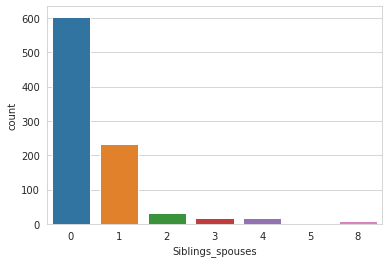

In [442]:
 sns.countplot(x= 'Siblings_spouses',data = dataset)

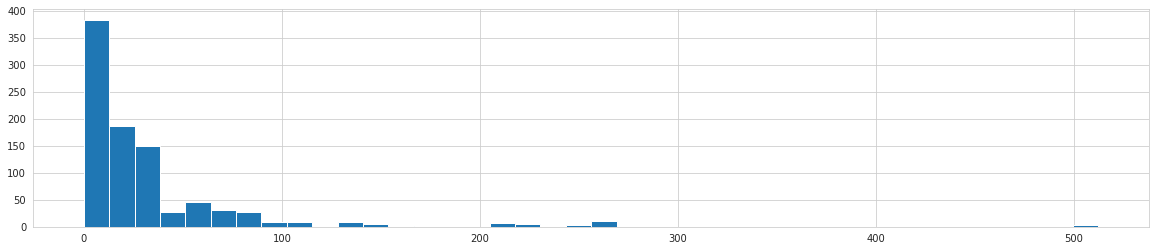

In [443]:
dataset['fare'].hist(bins = 40,figsize =(20,4))

In [444]:
import cufflinks as cf

In [445]:
cf.go_offline()

In [446]:
dataset['fare'].iplot(kind='hist',bins = 30)

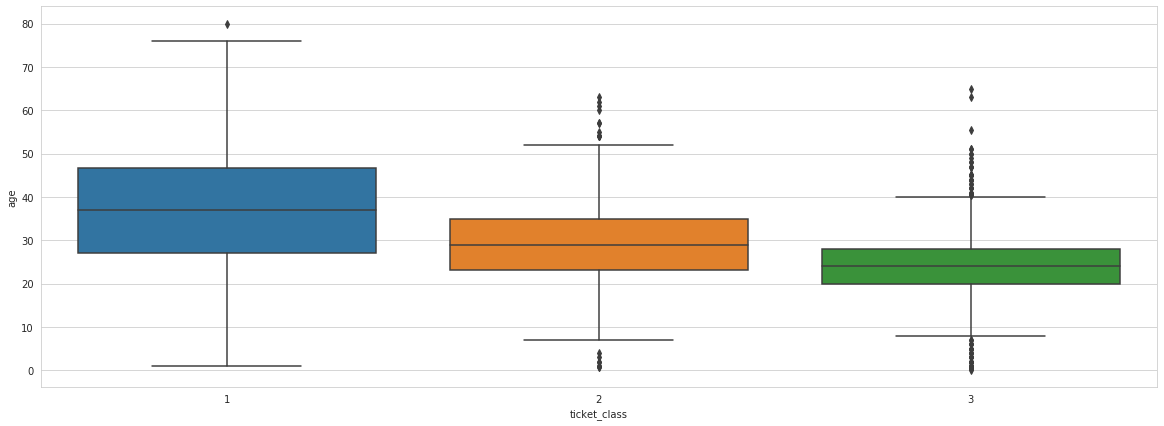

In [447]:

plt.figure(figsize =(20,7))
sns.boxplot(x='ticket_class',y = 'age', data =dataset )

In [448]:
def impute_age(cols):
    age = cols[0]
    ticket_class = cols[1]
    
    if pd.isnull(age):
        if ticket_class == 1:
            return 37
        elif ticket_class == 2:
            return 29
        else:
            return 24
    else:
        return age

In [449]:
dataset['age'] = dataset[['age','ticket_class']].apply(impute_age,axis = 1)
dataset_test['age'] = dataset_test[['age','ticket_class']].apply(impute_age,axis = 1)

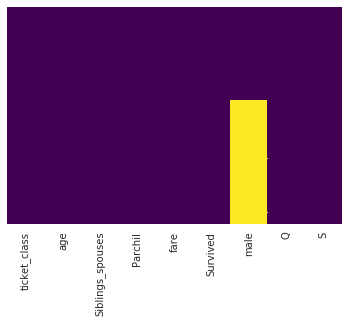

In [452]:
sns.heatmap(dataset.isnull(),yticklabels=False,cbar = False,cmap = 'viridis')

In [454]:
dataset.drop('cabin',axis = 1,inplace = True)
dataset.drop('MedBoat',axis = 1,inplace = True)  
dataset_test.drop('cabin',axis = 1,inplace = True)
dataset_test.drop('MedBoat',axis = 1,inplace = True)   

In [455]:
dataset.head()

,ticket_class,age,Siblings_spouses,Parchil,fare,Survived,male,Q,S
0,3,24.0,0,0,8.6625,0,1.0,0,1
1,3,26.0,0,0,7.8958,0,1.0,0,1
2,2,19.0,0,0,26.0000,1,1.0,0,1
3,3,24.0,8,2,69.5500,0,1.0,0,1
4,3,28.0,0,0,7.7750,0,1.0,0,1


In [456]:
dataset.dropna(inplace = True)
dataset_test.dropna(inplace = True)

In [458]:
sex  = pd.get_dummies(dataset['sex'],drop_first = True)
sex  = pd.get_dummies(dataset_test['sex'],drop_first = True)

In [424]:
embarked = pd.get_dummies(dataset_test['embarked'],drop_first = True)
embarked = pd.get_dummies(dataset['embarked'],drop_first = True)

In [425]:
dataset_test = pd.concat([dataset_test,sex,embarked],axis = 1)
dataset = pd.concat([dataset,sex,embarked],axis = 1)

In [426]:
dataset.head()

,traveller_ID,ticket_class,name,sex,age,Siblings_spouses,Parchil,TickNum,fare,embarked,Survived,male,Q,S
0,1214,3,"Smiljanic, Mr. Mile",male,24.0,0,0,315037,8.6625,S,0,1.0,0,1
1,677,3,"Bostandyeff, Mr. Guentcho",male,26.0,0,0,349224,7.8958,S,0,1.0,0,1
2,534,2,"Phillips, Miss. Kate Florence (""Mrs Kate Louis...",female,19.0,0,0,250655,26.0000,S,1,1.0,0,1
3,1174,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,24.0,8,2,CA. 2343,69.5500,S,0,1.0,0,1
4,864,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,S,0,1.0,0,1


In [427]:
dataset_test.drop(['sex','name','embarked','TickNum'],axis = 1, inplace = True)
dataset.drop(['sex','name','embarked','TickNum'],axis = 1, inplace = True)

In [428]:
dataset.head()

,traveller_ID,ticket_class,age,Siblings_spouses,Parchil,fare,Survived,male,Q,S
0,1214,3,24.0,0,0,8.6625,0,1.0,0,1
1,677,3,26.0,0,0,7.8958,0,1.0,0,1
2,534,2,19.0,0,0,26.0000,1,1.0,0,1
3,1174,3,24.0,8,2,69.5500,0,1.0,0,1
4,864,3,28.0,0,0,7.7750,0,1.0,0,1


In [436]:
dataset.drop(['traveller_ID'],axis = 1, inplace = True)

In [437]:
dataset_test.head()

,traveller_ID,ticket_class,age,Siblings_spouses,Parchil,fare,male,Q,S
0,1148.0,3.0,35.0,0.0,0.0,7.1250,1.0,0,1
1,1049.0,3.0,20.0,1.0,1.0,15.7417,1.0,0,1
2,982.0,3.0,24.0,0.0,0.0,7.8958,1.0,0,1
3,808.0,3.0,24.0,0.0,0.0,8.0500,1.0,0,1
4,1195.0,3.0,24.0,0.0,0.0,7.7500,1.0,0,1


In [463]:



X_train = dataset.drop('Survived', axis = 1)
y_train = dataset['Survived']

X_test = dataset_test.iloc[:,[0,1,2,3,4,5,7,8]].values

X_test

array([[1.14800e+03, 3.00000e+00, 3.50000e+01, ..., 7.12500e+00,
        0.00000e+00, 1.00000e+00],
       [1.04900e+03, 3.00000e+00, 2.00000e+01, ..., 1.57417e+01,
        0.00000e+00, 1.00000e+00],
       [9.82000e+02, 3.00000e+00, 2.40000e+01, ..., 7.89580e+00,
        0.00000e+00, 1.00000e+00],
       ...,
       [5.32000e+02, 2.00000e+00, 4.10000e+01, ..., 1.30000e+01,
        1.00000e+00, 0.00000e+00],
       [1.15900e+03, 3.00000e+00, 2.40000e+01, ..., 8.05000e+00,
        0.00000e+00, 1.00000e+00],
       [5.13000e+02, 2.00000e+00, 1.40000e+01, ..., 3.00708e+01,
        0.00000e+00, 0.00000e+00]])

In [464]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [465]:
Y_pred = lg.predict(X_test)

In [466]:
data = pd.DataFrame()
data['Traveller_ID'] = dataset_test.iloc[:,0].values
data['Survived'] = Y_pred

data

,Traveller_ID,Survived
0,1148.0,0
1,1049.0,0
2,982.0,0
3,808.0,0
4,1195.0,0
...,...,...
387,325.0,0
388,919.0,0
389,532.0,0
390,1159.0,0
